In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_theme(style='darkgrid')

In [4]:
from tensorflow.keras.utils import to_categorical
from tqdm import tqdm
import os
from PIL import Image

#### Define load parameters and paths

In [5]:
path_from_root = 'raw_data/sample-data/'
path_to_root = '../..'
labels_path = os.path.join(path_to_root, path_from_root)
img_path = os.path.join(path_to_root, path_from_root, 'images')
# labels = 'Data_Entry_2017.csv'  # FUll dataset labels
labels = 'sample_labels.csv'

In [6]:
os.getcwd()

'/home/santiago/code/Giovita/xray-exam-diagnosis-cnn/notebooks/santiago-giovagnoli'

In [7]:
! ls ../../raw_data/sample-data

images	sample_labels.csv


In [8]:
y = pd.read_csv(os.path.join(labels_path, labels))

In [9]:
y.describe()

,Follow-up #,Patient ID,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
count,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000,5606.000000
mean,8.616661,14330.617017,2644.795755,2491.087406,0.155467,0.155467
std,15.565815,8411.477789,347.188754,399.119063,0.016201,0.016201
min,0.000000,13.000000,1362.000000,966.000000,0.115000,0.115000
25%,0.000000,7289.000000,2500.000000,2048.000000,0.143000,0.143000
50%,3.000000,13993.000000,2542.000000,2544.000000,0.143000,0.143000
75%,10.000000,20655.500000,2992.000000,2991.000000,0.168000,0.168000
max,177.000000,30797.000000,3266.000000,3056.000000,0.198800,0.198800


In [10]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5606 entries, 0 to 5605
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Image Index                  5606 non-null   object 
 1   Finding Labels               5606 non-null   object 
 2   Follow-up #                  5606 non-null   int64  
 3   Patient ID                   5606 non-null   int64  
 4   Patient Age                  5606 non-null   object 
 5   Patient Gender               5606 non-null   object 
 6   View Position                5606 non-null   object 
 7   OriginalImageWidth           5606 non-null   int64  
 8   OriginalImageHeight          5606 non-null   int64  
 9   OriginalImagePixelSpacing_x  5606 non-null   float64
 10  OriginalImagePixelSpacing_y  5606 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 481.9+ KB


In [11]:
y['Finding Labels'].value_counts()

No Finding                                                3044
Infiltration                                               503
Effusion                                                   203
Atelectasis                                                192
Nodule                                                     144
                                                          ... 
Atelectasis|Edema|Effusion|Infiltration|Pneumonia            1
Atelectasis|Consolidation|Edema|Infiltration|Pneumonia       1
Atelectasis|Effusion|Hernia                                  1
Atelectasis|Hernia|Pneumothorax                              1
Cardiomegaly|Effusion|Emphysema                              1
Name: Finding Labels, Length: 244, dtype: int64

In [12]:
y.head(15)

,Image Index,Finding Labels,Follow-up #,Patient ID,Patient Age,Patient Gender,View Position,OriginalImageWidth,OriginalImageHeight,OriginalImagePixelSpacing_x,OriginalImagePixelSpacing_y
0,00000013_005.png,Emphysema|Infiltration|Pleural_Thickening|Pneu...,5,13,060Y,M,AP,3056,2544,0.139000,0.139000
1,00000013_026.png,Cardiomegaly|Emphysema,26,13,057Y,M,AP,2500,2048,0.168000,0.168000
2,00000017_001.png,No Finding,1,17,077Y,M,AP,2500,2048,0.168000,0.168000
3,00000030_001.png,Atelectasis,1,30,079Y,M,PA,2992,2991,0.143000,0.143000
4,00000032_001.png,Cardiomegaly|Edema|Effusion,1,32,055Y,F,AP,2500,2048,0.168000,0.168000
5,00000040_003.png,Consolidation|Mass,3,40,068Y,M,PA,2500,2048,0.168000,0.168000
6,00000042_002.png,No Finding,2,42,071Y,M,AP,3056,2544,0.139000,0.139000
7,00000057_001.png,No Finding,1,57,071Y,M,AP,3056,2544,0.139000,0.139000
8,00000061_002.png,Effusion,2,61,077Y,M,PA,2992,2991,0.143000,0.143000
9,00000061_019.png,No Finding,19,61,077Y,M,AP,3056,2544,0.139000,0.139000


In [13]:
# def load_xray_data_test(path):
#     # adapted from challenge 4 CNN
    
#     # data_path = 'raw_data/sample/data'
#     # classes = {'No Findings':0, 'Atelectasis':1, 'Consolidation':2}  # No need for loading data. 
#     imgs = []
#     labels = []
#     for (cl, i) in classes.items():
#         images_path = [elt for elt in os.listdir(os.path.join(data_path, cl)) if elt.find('.png')>0]
#         for img in tqdm(images_path[:300]):
#             path = os.path.join(data_path, cl, img)
#             if os.path.exists(path):
#                 image = Image.open(path)
#                 # image = image.resize((256, 256))  # No image resizing. 
#                 imgs.append(np.array(image))
#                 labels.append(i)
                
#     return imgs

In [14]:
# ! ls ../../raw_data/full-dataset
# ! ls ../../raw_data/sample-data/

In [15]:
path_to_sample_img = os.path.join(path_to_root, path_from_root)
path_to_sample_img

'../../raw_data/sample-data/'

In [16]:
sample_img = Image.open(os.path.join(img_path, '00014015_001.png'))

In [17]:
img_array = np.array(sample_img)
img_array.shape

(1024, 1024)

In [18]:
def load_xray_data(img_folder, n_images=0):
    
    # High memory consumption
    
    imgs = []
    
    images_path = [elt for elt in os.listdir(img_folder) if elt.find('.png')>0]
    if n_images: 
        images = images_path[:n_images]
    else:
        images = images_path    
    
    for img in tqdm(images):

#     for img in img_folder:
        path = os.path.join(img_folder, img)
        # print(path)
        if os.path.exists(path):
            image = Image.open(path)
            image_np = np.array(image)
            if len(image_np.shape) != 2:
                # print(img, image_np.shape, np.min(image_np[:,:,3]))
                # image_np = 
                imgs.append(image_np[:,:,0])
            else:
                imgs.append(image_np)
    
    return np.array(imgs)


In [ ]:
# imgs = load_xray_data(img_path)

# imgs.shape

# Load with Tensorflow

In [19]:
from tensorflow.keras.utils import image_dataset_from_directory
import tensorflow as tf

In [20]:
whos

Variable                       Type            Data/Info
--------------------------------------------------------
Image                          module          <module 'PIL.Image' from <...>e-packages/PIL/Image.py'>
image_dataset_from_directory   function        <function image_dataset_f<...>ectory at 0x7f23e8a6fee0>
img_array                      ndarray         1024x1024: 1048576 elems, type `uint8`, 1048576 bytes (1.0 Mb)
img_path                       str             ../../raw_data/sample-data/images
labels                         str             sample_labels.csv
labels_path                    str             ../../raw_data/sample-data/
load_xray_data                 function        <function load_xray_data at 0x7f2470e430d0>
np                             module          <module 'numpy' from '/ho<...>kages/numpy/__init__.py'>
os                             module          <module 'os' from '/home/<...>8.6/lib/python3.8/os.py'>
path_from_root                 str             raw_d

# To Do

1. Load images into one dataset/Tensor
2. tf.keras.datasets how do they work?
3. Define multiclass detection.
4. Define link between tables to join x and y ( make sure that every X has a y)
5. Build X_test, X_train, X_val, y_train, y_test, y_val
6. Image resizing? What size do they all have?

In [21]:
img_path

'../../raw_data/sample-data/images'

In [23]:
# img_ds.map(lambda x: (tf.cast(x, tf.uint8)))

In [22]:
img_ds = image_dataset_from_directory(img_path, labels=None, color_mode='grayscale', image_size=(1028, 1028))

Found 5606 files belonging to 1 classes.


2021-10-12 15:44:31.426244: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2021-10-12 15:44:31.426272: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (alienware): /proc/driver/nvidia/version does not exist
2021-10-12 15:44:31.428027: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [45]:
from pprint import pprint

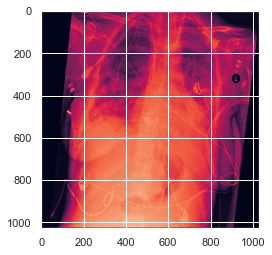

In [47]:
for idx, picture in enumerate(img_ds.as_numpy_iterator()):
    if idx > 2:
        break
    
    plt.imshow(picture[3,:,:,:])
    # pprint(picture[3,:,:,:])

In [62]:
y.rename(columns={'Image Index':'image_index', 'Finding Labels':'labels'}, inplace=True)

In [67]:
y.labels.value_counts()

No Finding                                                3044
Infiltration                                               503
Effusion                                                   203
Atelectasis                                                192
Nodule                                                     144
                                                          ... 
Atelectasis|Edema|Effusion|Infiltration|Pneumonia            1
Atelectasis|Consolidation|Edema|Infiltration|Pneumonia       1
Atelectasis|Effusion|Hernia                                  1
Atelectasis|Hernia|Pneumothorax                              1
Cardiomegaly|Effusion|Emphysema                              1
Name: labels, Length: 244, dtype: int64

In [69]:
from itertools import chain

In [81]:
all_labels = np.unique(list(chain(*y['labels'].map(lambda x: x.split('|')).tolist())))
all_labels = {x[1]:x[0] for x in zip(range(1, len(all_labels)),all_labels) if len(x)>0 and x != 'No Finding'}
all_labels['No Findings'] = 0
all_labels

{'Atelectasis': 1,
 'Cardiomegaly': 2,
 'Consolidation': 3,
 'Edema': 4,
 'Effusion': 5,
 'Emphysema': 6,
 'Fibrosis': 7,
 'Hernia': 8,
 'Infiltration': 9,
 'Mass': 10,
 'No Finding': 11,
 'Nodule': 12,
 'Pleural_Thickening': 13,
 'Pneumonia': 14,
 'No Findings': 0}

In [58]:
for el in os.walk(img_path):
    print(el)

('../../raw_data/sample-data/images', [], ['00006479_001.png', '00012704_015.png', '00028509_038.png', '00020945_023.png', '00002913_001.png', '00012834_035.png', '00001951_000.png', '00002919_004.png', '00011814_009.png', '00025295_002.png', '00017726_002.png', '00030120_000.png', '00006413_003.png', '00018287_000.png', '00009973_003.png', '00009997_000.png', '00001958_014.png', '00001006_002.png', '00010358_000.png', '00009507_017.png', '00009710_004.png', '00019006_004.png', '00017138_110.png', '00004555_000.png', '00011272_002.png', '00018387_006.png', '00019395_018.png', '00010007_087.png', '00014201_000.png', '00026372_003.png', '00014024_003.png', '00002611_010.png', '00005138_012.png', '00013392_001.png', '00011857_013.png', '00002860_016.png', '00003028_051.png', '00016601_001.png', '00007540_000.png', '00027017_000.png', '00018627_002.png', '00020047_002.png', '00004509_000.png', '00011291_002.png', '00013187_003.png', '00017236_084.png', '00027706_014.png', '00023956_000.png